In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def general_dataset_info(dataset):
    print("----------Null Values----------\n", dataset.isnull().sum())
    print("\n----------Duplicate Values----------\n", dataset.duplicated().sum())
    print("\nTotal entries:", len(dataset))

In [5]:
def boxplot_data(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(4, 2))
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.xticks(rotation=90) 
        plt.show()

In [6]:
def histogram_data(dataset):
    for column in dataset.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=dataset, x=column, bins=20, kde=False)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.xticks(rotation=90) 
        plt.show()

## Import Datasets and Preview Data

In [7]:
cpi_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CPI.csv"
sales_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CarSales.csv"
features_url = "https://raw.githubusercontent.com/laurgu/CSI-4124-Term-Project/Part2/Datasets/CarFeatures.csv"

cpi = pd.read_csv(cpi_url)
sales = pd.read_csv(sales_url)
features = pd.read_csv(features_url)

In [8]:
cpi.head()

cpi = cpi.rename(columns={'CPIAUCSL': 'CPI'})
cpi.head()

,DATE,CPI
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [9]:
sales.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [10]:
features.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Preprocess CPI Dataset

Check if the dataset has any null or duplicate values.

In [11]:
general_dataset_info(cpi)

----------Null Values----------
 DATE    0
CPI     0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 925


This dataset has no null or duplicate values.

Split "DATE" column into "Year", "Month", "Day" columns and cast these values into ints. Cast the cpi value to a float.

In [12]:
cpi[['Year', 'Month', 'Day']] = cpi['DATE'].str.split('-', expand=True)
cpi.drop(['DATE'], axis=1, inplace=True)
cpi[['Year', 'Month', 'Day']] = cpi[['Year', 'Month', 'Day']].astype(int)
cpi['CPI'] = cpi['CPI'].astype(float)
cpi.head()

,CPI,Year,Month,Day
0,21.48,1947,1,1
1,21.62,1947,2,1
2,22.00,1947,3,1
3,22.00,1947,4,1
4,21.95,1947,5,1


Need to like plot without date 

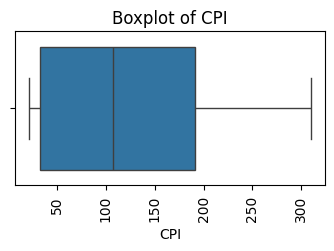

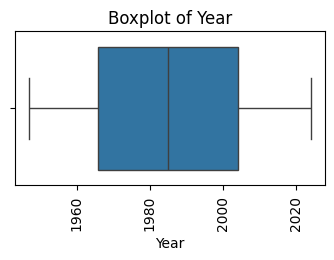

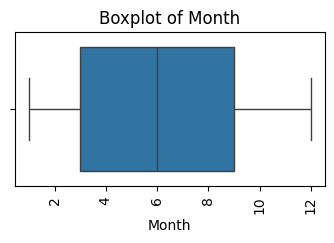

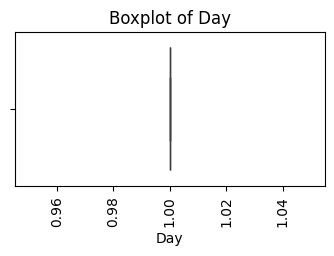

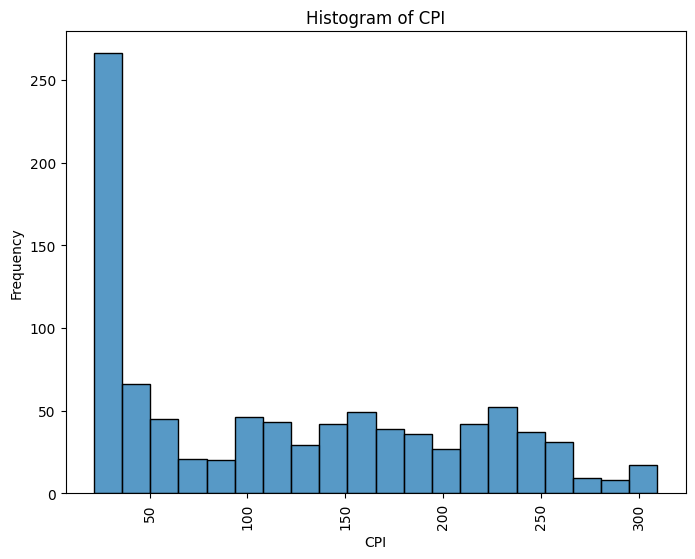

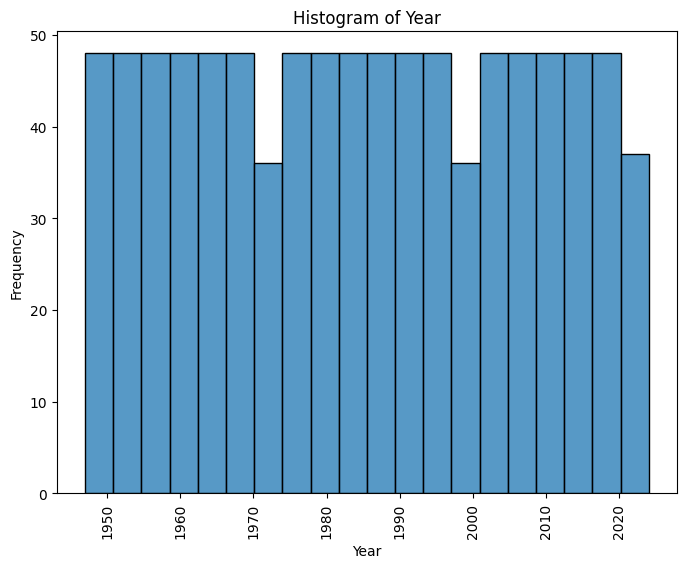

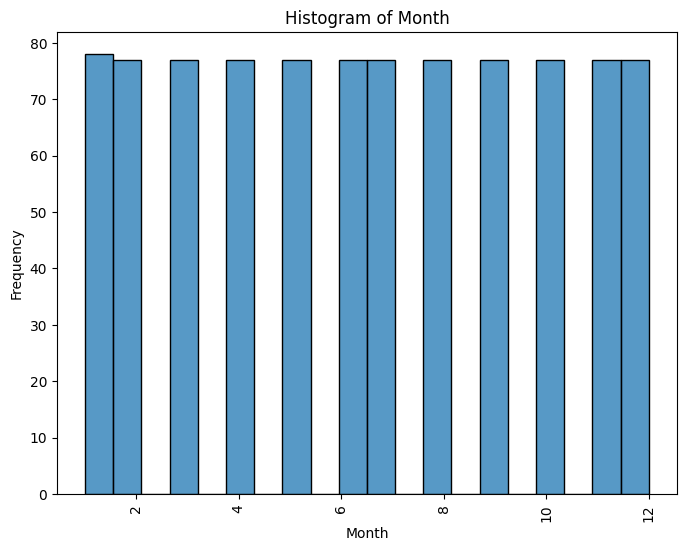

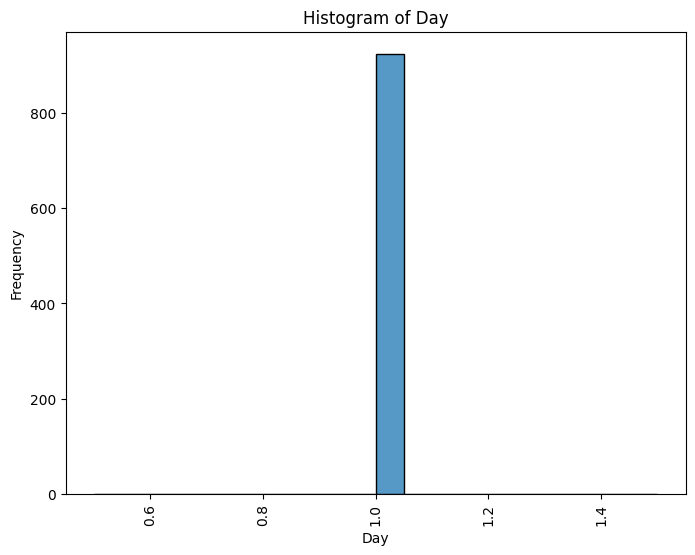

In [13]:
boxplot_data(cpi)
histogram_data(cpi)

## Preprocess Sales Dataset

Check if the dataset has any null or duplicate values.

In [14]:
general_dataset_info(sales)

----------Null Values----------
 Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 23906


There is only one entry where the customer name is NULL. For simplicity, we drop this entry. 

In [15]:
sales = sales.dropna()
sales.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

Split 'Date' column into 'Year', 'Month', 'Day' columns and cast these values as well as 'Annual Income', 'Price', 'Phone' into ints. 

In [16]:
sales[['Month', 'Day', 'Year']] = sales['Date'].str.split('/', expand=True)
sales.drop(['Date'], axis=1, inplace=True)
sales = sales.rename(columns={'Price ($)': 'Price'})
sales[['Year', 'Month', 'Day', 'Annual Income', 'Price', 'Phone']] = sales[['Year', 'Month', 'Day', 'Annual Income', 'Price', 'Phone']].astype(int)
sales.head()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region,Month,Day,Year
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,1,2,2022
1,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1,2,2022
2,C_CND_000003,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1,2,2022
3,C_CND_000004,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,1,2,2022
4,C_CND_000005,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,1,2,2022


In [17]:
sales['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

Replace typo with correct spelling of term.

In [18]:
sales.replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)
sales['Engine'].unique()

array(['Double Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

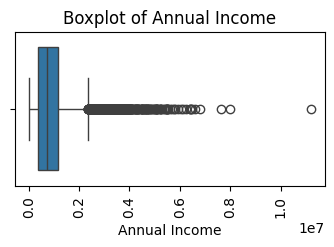

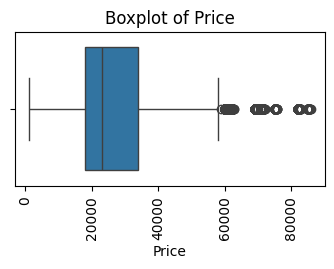

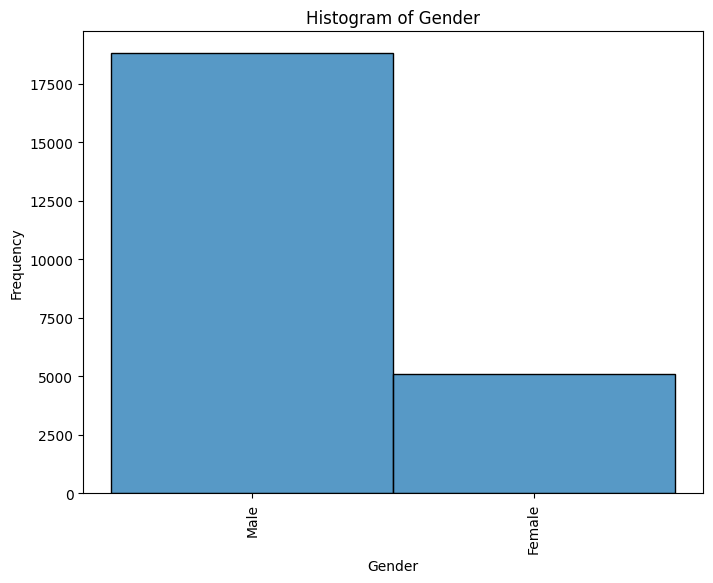

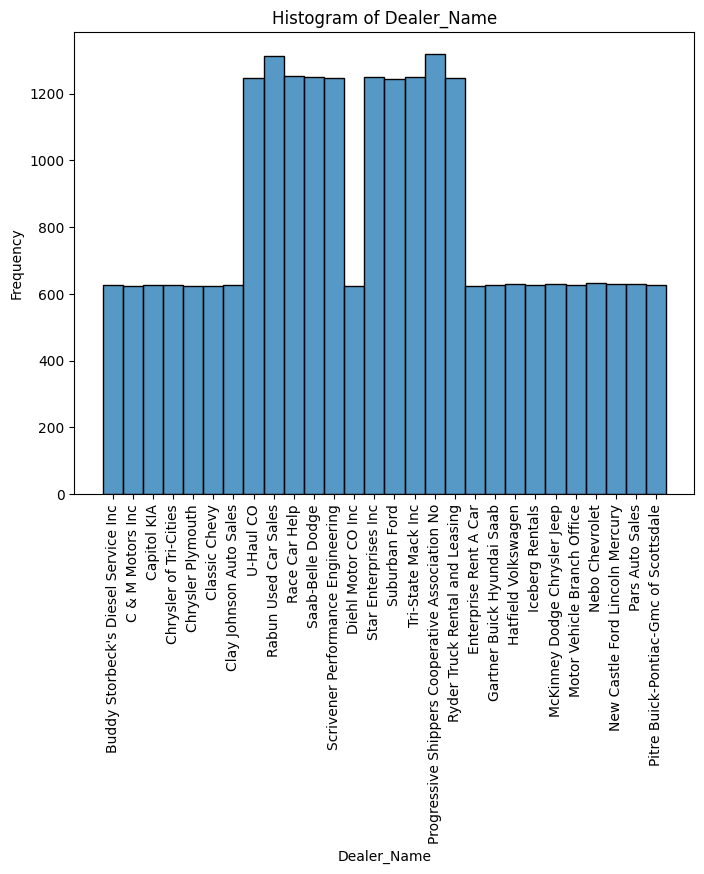

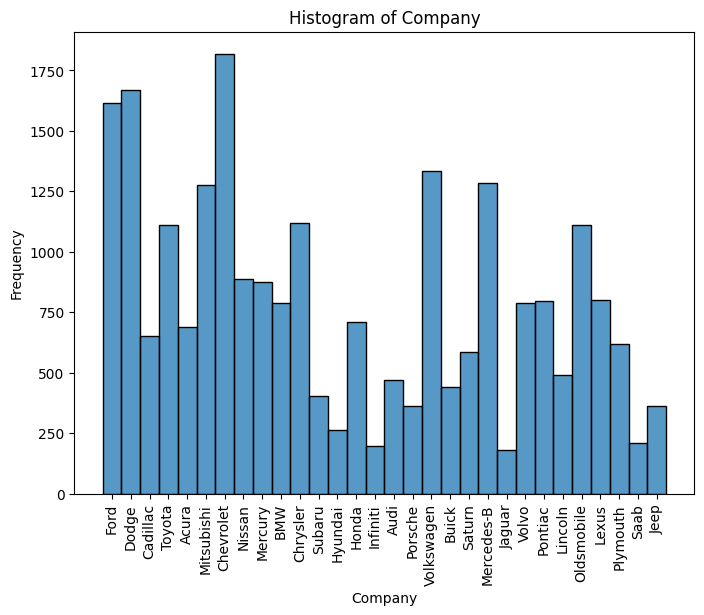

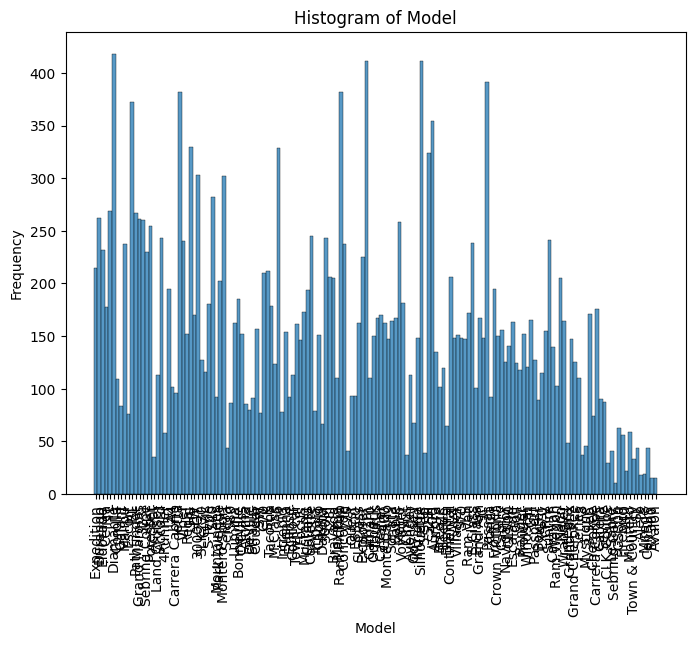

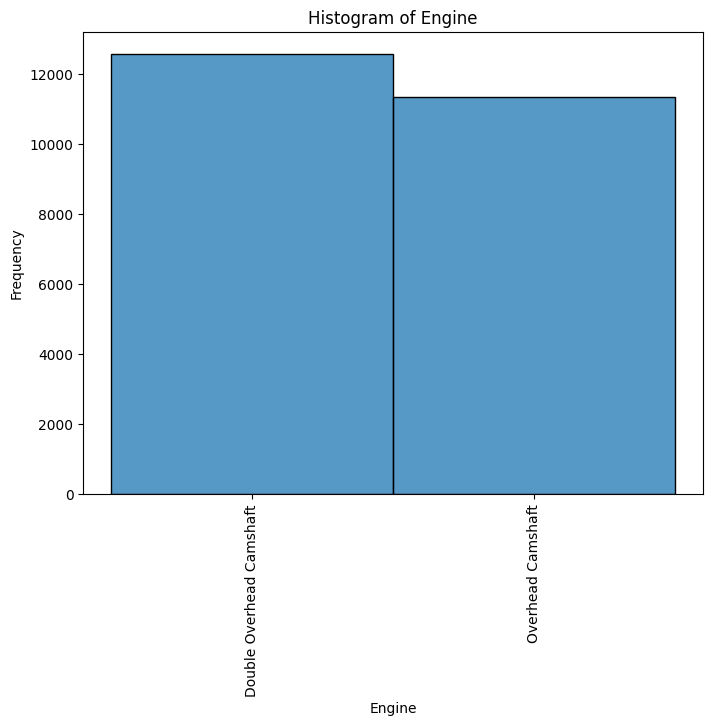

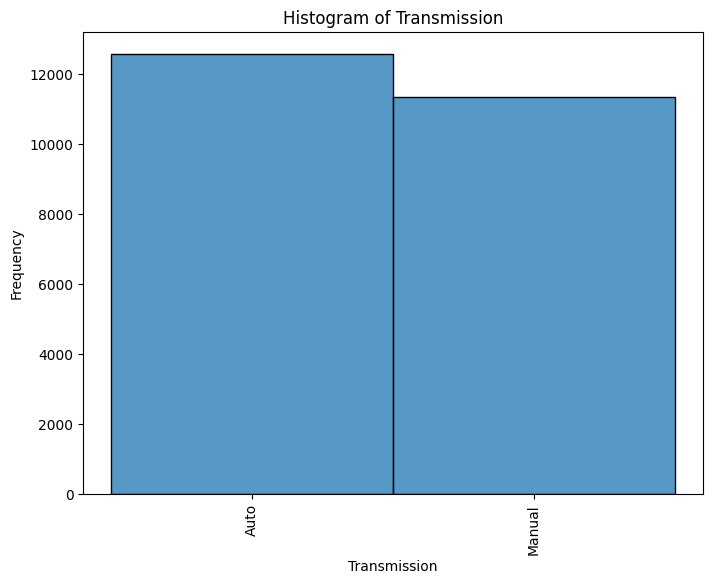

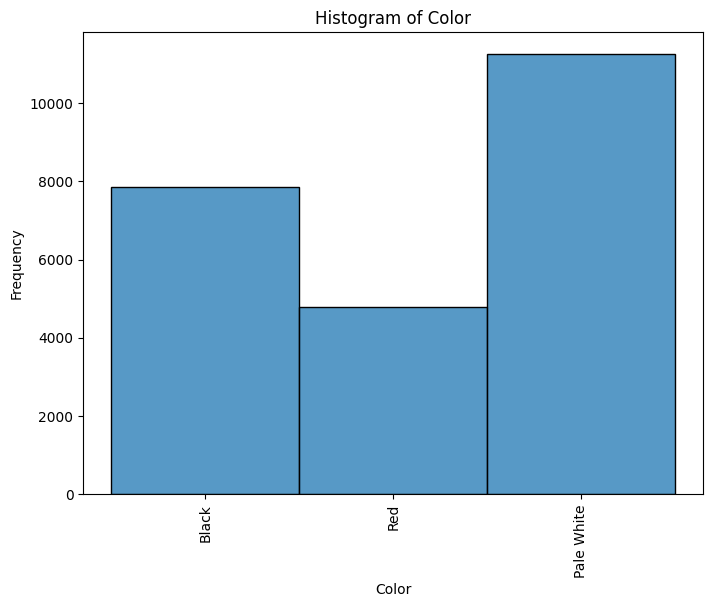

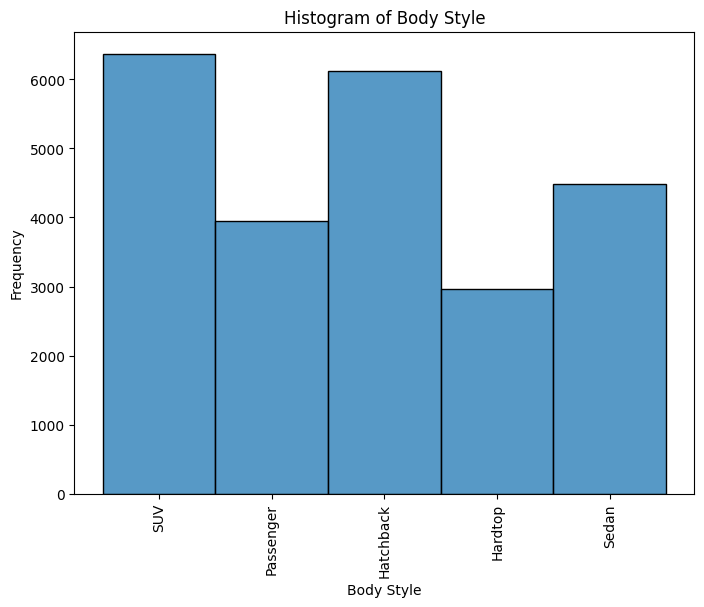

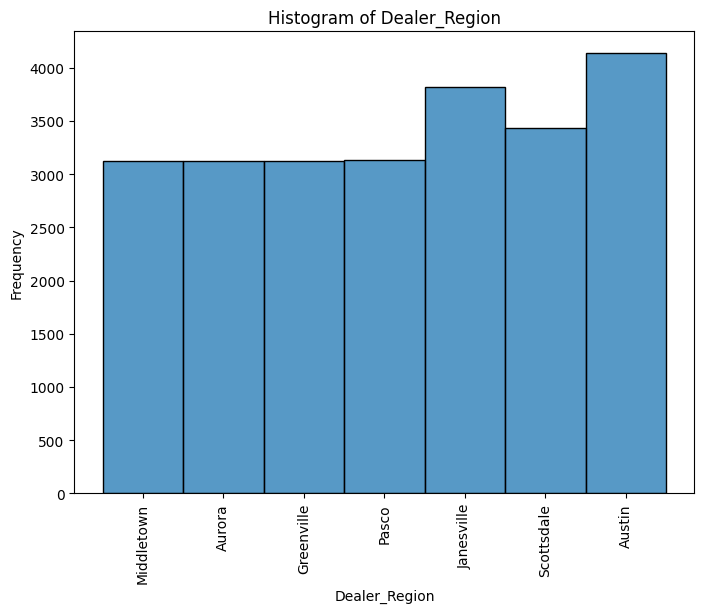

In [19]:
columns = ['Annual Income', 'Price']
sales_reduced = sales[columns]
boxplot_data(sales_reduced)

columns = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color','Body Style', 'Dealer_Region']
sales_reduced = sales[columns]
histogram_data(sales_reduced)

In [22]:
sales.describe()

,Annual Income,Price,Phone,Month,Day,Year
count,2.390500e+04,23905.000000,2.390500e+04,23905.000000,23905.000000,23905.000000
mean,8.308466e+05,28089.540473,7.497753e+06,7.852792,15.473499,2022.554738
std,7.200208e+05,14788.592495,8.675080e+05,3.257990,8.734092,0.497005
min,1.008000e+04,1200.000000,6.000101e+06,1.000000,1.000000,2022.000000
25%,3.860000e+05,18001.000000,6.746465e+06,5.000000,8.000000,2022.000000
50%,7.350000e+05,23000.000000,7.496199e+06,9.000000,15.000000,2023.000000
75%,1.176000e+06,34000.000000,8.248172e+06,11.000000,23.000000,2023.000000
max,1.120000e+07,85800.000000,8.999579e+06,12.000000,31.000000,2023.000000


## Preprocess Features Dataset

Check if the dataset has any null or duplicate values.

In [ ]:
general_dataset_info(features)

This dataset has many NULL enteries in the "Market Category" column; too many to drop these enteries. We will drop the "Market Category" column altogether. The nuber of NULL values in "Engine HP" and "Engine Cylinders" is insignificant given the total number of enteries. We will drop these enteries. 

There are several duplicates in this dataset. To address this issue, we will only keep the first occurence of an entry. 

In [ ]:
features = features.drop('Market Category', axis=1)
features = features.dropna()
features.drop_duplicates(keep='first', inplace=True)
general_dataset_info(features)

----------Null Values----------
 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

----------Duplicate Values----------
 0

Total entries: 11092


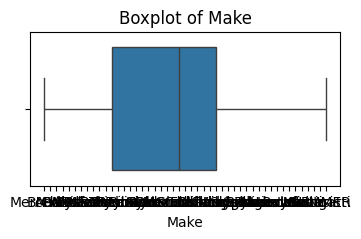

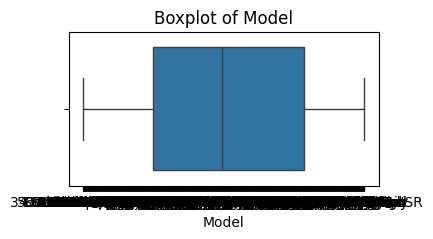

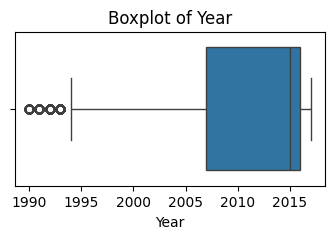

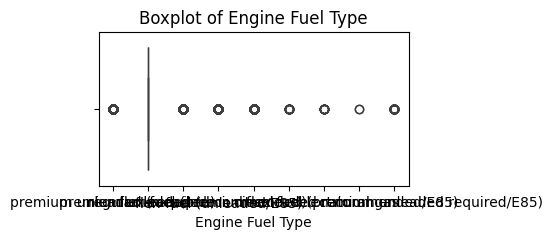

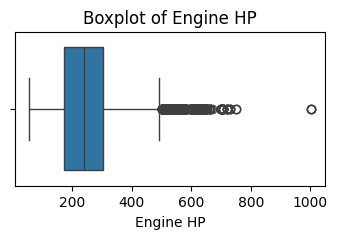

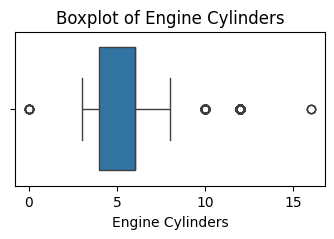

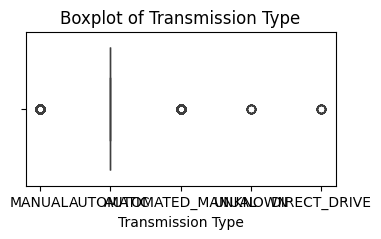

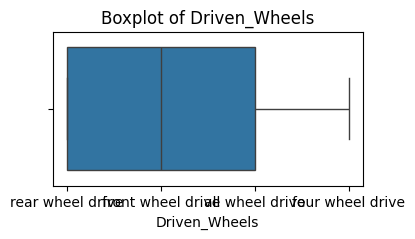

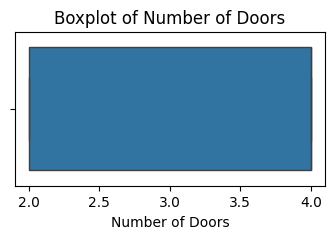

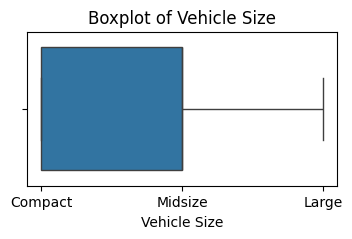

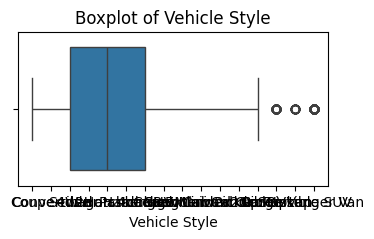

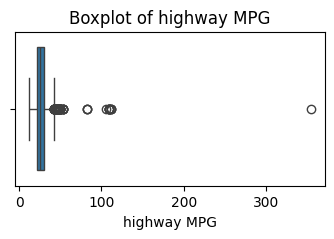

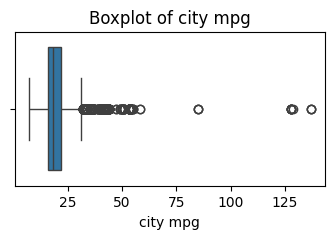

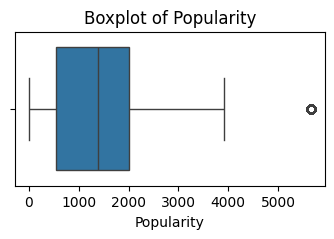

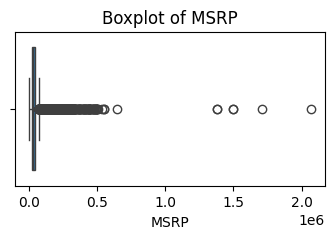

In [ ]:
boxplot_data(features)

## Import Into MySql Database

In [1]:
# Create connection
import mysql.connector

connection = mysql.connector.connect(
    user='root',
    password='password',
    host='localhost',
    database='db'
)

# Check connection
if connection.is_connected():
    print("Connected")
else:
    print("Failed to connect")

Connected


### CPI